# Part 1: The Invariant Mass Distribution

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import scipy.stats as st

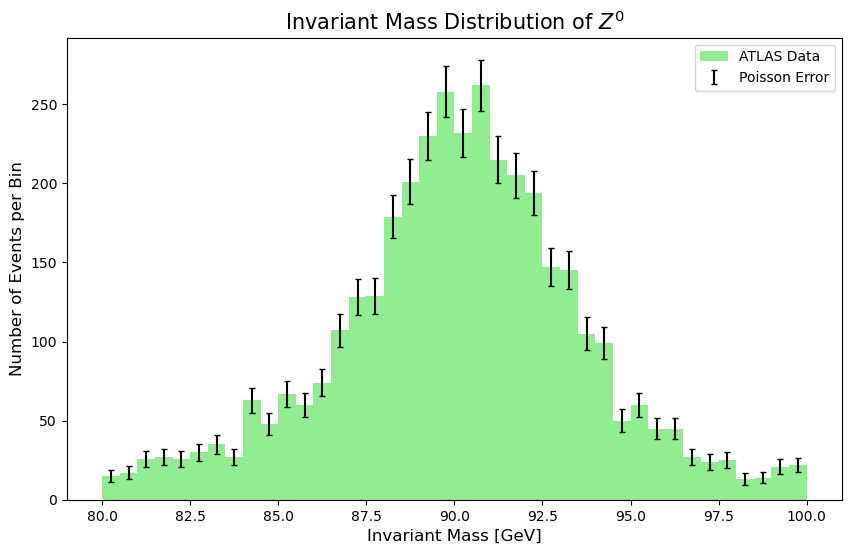

In [37]:
data = np.loadtxt("atlas_z_to_ll.csv", delimiter = ",", skiprows=1)

#organizing the data
pt1 = data[:0] # particle 1
pt2 = data[:1]

eta1 = data[:2]
eta2 = data[:3]

phi1= data[:4]
phi2 = data[:5]

E1 = data[:6] # energy 1
E2 = data[:7]

# calculating values
# find the values for each particle then sum it, then put it into equation 2
# c is equal to 1
# Extract columns from data
pt1, pt2 = data[:, 0], data[:, 1]
eta1, eta2 = data[:, 2], data[:, 3]
phi1, phi2 = data[:, 4], data[:, 5]
E1, E2 = data[:, 6], data[:, 7]

# Function to compute invariant mass
def invariantMass(pt1, pt2, eta1, eta2, phi1, phi2, E1, E2):
    px1, py1, pz1 = pt1 * np.cos(phi1), pt1 * np.sin(phi1), pt1 * np.sinh(eta1)
    px2, py2, pz2 = pt2 * np.cos(phi2), pt2 * np.sin(phi2), pt2 * np.sinh(eta2)

    px, py, pz = px1 + px2, py1 + py2, pz1 + pz2
    E = E1 + E2

    M2 = E**2 - (px**2 + py**2 + pz**2)
    return np.sqrt(np.maximum(M2, 0)) 

# calculate masses
mass = invariantMass(pt1, pt2, eta1, eta2, phi1, phi2, E1, E2)

bins = np.linspace(80, 100, 41)
hist, binEdges = np.histogram(mass, bins=bins)
binCenter = 0.5 * (binEdges[:-1] + binEdges[1:])
err = np.sqrt(hist)  # Poisson errors: sqrt(N)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(mass, bins=bins, color = "lightgreen", label = "ATLAS Data")
ax.errorbar(binCenter, hist, yerr=err,color='black', label='Poisson Error', ls="", capsize =2)
ax.set_xlabel("Invariant Mass [GeV]", fontsize =12)
ax.set_ylabel("Number of Events per Bin", fontsize =12)
ax.set_title(r"Invariant Mass Distribution of $Z^0$", fontsize = 15)
ax.legend()


# Part 2: Breit-Wigner Fit

In [49]:
# 1, coding the function
def breitWigner(m, m0, gamma):
    decay = (1/np.pi) * (gamma/2) /((m-m0)**2 + (gamma/2)**2)
    return decay

def decayNorm(m, m0, gamma):
    return (5000/2)*breitWigner(m,m0,gamma)

# 2, fit the mass-distribution with the breit-wigner function
# based on (5000/2) x D
mask = (binCenter > 87) & (binCenter < 93)
xFit = binCenter[mask]
yFit = hist[mask]
yErr = err[mask]

popt, pcov = curve_fit(decayNorm, xFit, yFit, sigma=yErr, absolute_sigma=True)
m0Fit, gammaFit = popt
m0Err, gammaErr = np.sqrt(np.diag(pcov))
print(f"Fitted m0 is {m0Fit:.2f} with an uncertainty of +/- {m0Err} GeV") # check the rounding
print(f"Fitted r is {gammaFit:.2f} with an uncertainty of +/-{gammaErr} GeV")

Fitted m0 is 90.34 with an uncertainty of +/- 0.09351482697391572 GeV
Fitted r is 6.39 with an uncertainty of +/-0.18107387802357996 GeV


Chi-squared is 9.985097164263701
Reduced Chi-square is 0.9985097164263701
Chi-dist value is 0.4418017385627294


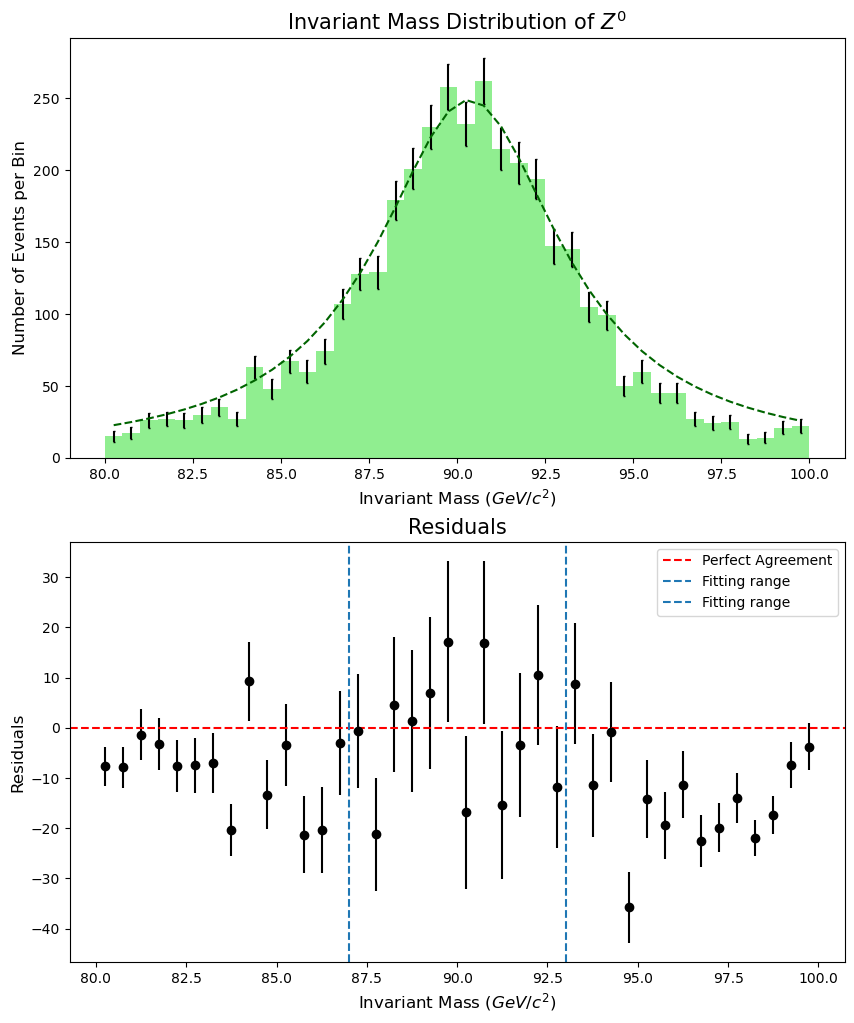

In [92]:
# 3/4
massFit = decayNorm(binCenter, m0Fit, gammaFit)
massTheory = decayNorm(binCenter, m0Fit, gammaFit)

#Chi^2 test
chisq = np.sum(((hist[mask] - massTheory[mask])/yErr)**2)
N = len(hist[mask])
d = 2
dof = N-d
pVal = st.chi2.sf(chisq, dof)
reducedChisq = chisq/dof
print(f"Chi-squared is {chisq}")
print(f"Reduced Chi-square is {reducedChisq}")
print(f"Chi-dist value is {pVal}") # check this value again

residuals = hist-massTheory # for the second plot

#Plotting
fig, (ax, ax1) = plt.subplots(2,1, figsize=(10,12))
#first plot
ax.hist(mass, bins= bins, label = "ATLAS Data", color = "lightgreen") #PICK DIFFERENT COLORS LATER
ax.errorbar(binCenter, hist, err, ls = "", color = "black", capsize = 1)
ax.plot(binCenter, massFit, ls = "--", color="darkgreen", label="Theory Fit")
ax.set_ylabel("Number of Events per Bin", fontsize = 12)
ax.set_xlabel(r"Invariant Mass $(GeV/c^2)$", fontsize = 12)
ax.set_title(r"Invariant Mass Distribution of $Z^0$", fontsize = 15)

# Second plot
ax1.errorbar(binCenter, residuals, err, ls ="", color = "black", marker = "o")
ax1.axhline(0,ls = "--", color ="red", label ="Perfect Agreement")
ax1.axvline(87,ls = "--", label="Fitting range")
ax1.axvline(93,ls = "--", label = "Fitting range")
ax1.set_title("Residuals", fontsize = 15)
ax1.set_xlabel(r"Invariant Mass $(GeV/c^2)$", fontsize = 12)
ax1.set_ylabel("Residuals", fontsize=12)
ax1.legend() #somehow get both the vlines in the same label, ask

# 5, covariance matrix, calc best m0, uncertainty
covariance = np.cov(


# Part 3: 2D Parameter Contours

In [97]:
#1, chi2 test


bins = 300
chiMap = np.zeros((bins, bins))
width = np.linspace(5, 8, bins)
mass = np.linspace(89, 91, bins)

chiMin = np.min(chisq)

X, Y = np.meshgrid(mass, width)

fig, ax = plt.subplots()
contour = ax.contour(X, Y, deltaChi, 500, cmap = "inferno")
cbar = fig.colorbar(contour, ax=ax)


